# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Exploratory analysis of the data

### Read and check the file

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


We can conclude that the data are all numericals and no object columns so no need for any action

### Check for null values

In [5]:
null = pd.DataFrame(df.isnull().sum())
null[0].unique()

array([0], dtype=int64)

No null values in the dataset!

### Cleaning Text and Removing Special Characters

In [6]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

We can notice that there is some spaces before and after the column names so we need to get rid of these spaces 

In [7]:
df = df.rename(columns=lambda x: x.strip())

### Check out the duplicates in the ID column

In [8]:
before = len(df)
df = df.drop_duplicates()
after = len(df)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  0


### Check for low variances columns

In [9]:
low_variance = []
for col in df._get_numeric_data():
    minimum = min(df[col])
    ninety_perc = np.percentile(df[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)
print(low_variance)

['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']


In [10]:
df = df.drop(['Liability-Assets Flag', 'Net Income Flag'], axis = 1)

The low variance columns are binary columns with 1 and 0

### check for outliers

In [11]:
outliers = pd.DataFrame(columns=df.columns)
stats = df.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = df[(df[col] < lower) |
                   (df[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
outliers.value_counts('Outlier')

Outlier
Degree of Financial Leverage (DFL)                    1503
Interest Coverage Ratio (Interest expense to EBIT)    1421
Fixed Assets Turnover Frequency                       1418
Current Asset Turnover Rate                           1399
Total Asset Growth Rate                               1381
                                                      ... 
Current Liability to Liability                          40
Current Liabilities/Liability                           40
Net worth/Assets                                        30
Debt ratio %                                            30
Quick Assets/Total Assets                                2
Length: 89, dtype: int64

We can notice several outliers in this dataset but we decided to ignore them for the moment. They could be decisive datapoints important for the analysis 

### correlation matrix to identify the colinearity

In [12]:
# First we determine the absolute correlation between the pair of columns and represent them in a dataframe
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [13]:
# Create a list of name of columns that have a correlation > 0.9 with at least one other column
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(); print(to_drop)


['ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Realized Sales Gross Margin', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Continuous interest rate (after tax)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Per Share Net profit before tax (Yuan ¥)', 'Regular Net Profit Growth Rate', 'Net worth/Assets', 'Operating profit/Paid-in capital', 'Net profit before tax/Paid-in capital', 'Cash Flow to Sales', 'Current Liability to Liability', 'Current Liability to Equity', 'Net Income to Total Assets', 'Gross Profit to Sales', 'Liability to Equity']


In [14]:
# Reduce the dataframe into a dataframe that represent only the columns with high colinearity for better visualizaiton on heatmap
columns = ['ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Realized Sales Gross Margin', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Continuous interest rate (after tax)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Per Share Net profit before tax (Yuan ¥)', 'Regular Net Profit Growth Rate', 'Net worth/Assets', 'Operating profit/Paid-in capital', 'Net profit before tax/Paid-in capital', 'Cash Flow to Sales', 'Current Liability to Liability', 'Current Liability to Equity', 'Net Income to Total Assets', 'Gross Profit to Sales', 'Liability to Equity']
df2 = df[columns]
df2.head()

,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Realized Sales Gross Margin,Pre-tax net Interest Rate,After-tax net Interest Rate,Continuous interest rate (after tax),Net Value Per Share (A),Net Value Per Share (C),Per Share Net profit before tax (Yuan ¥),Regular Net Profit Growth Rate,Net worth/Assets,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Cash Flow to Sales,Current Liability to Liability,Current Liability to Equity,Net Income to Total Assets,Gross Profit to Sales,Liability to Equity
0,0.424389,0.405750,0.601457,0.796887,0.808809,0.780985,0.147950,0.147950,0.138736,0.688979,0.792424,0.095885,0.137757,0.671568,0.676269,0.339077,0.716845,0.601453,0.290202
1,0.538214,0.516730,0.610235,0.797380,0.809301,0.781506,0.182251,0.182251,0.169918,0.689702,0.828824,0.093743,0.168962,0.671570,0.308589,0.329740,0.795297,0.610237,0.283846
2,0.499019,0.472295,0.601364,0.796403,0.808388,0.780284,0.177911,0.193713,0.142803,0.689470,0.792484,0.092318,0.148036,0.671571,0.446027,0.334777,0.774670,0.601449,0.290189
3,0.451265,0.457733,0.583541,0.796967,0.808966,0.781241,0.154187,0.154187,0.148603,0.689110,0.848535,0.077727,0.147561,0.671519,0.615848,0.331509,0.739555,0.583538,0.281721
4,0.538432,0.522298,0.598783,0.797366,0.809304,0.781550,0.167502,0.167502,0.168412,0.689697,0.893491,0.096927,0.167461,0.671563,0.975007,0.330726,0.795016,0.598782,0.278514


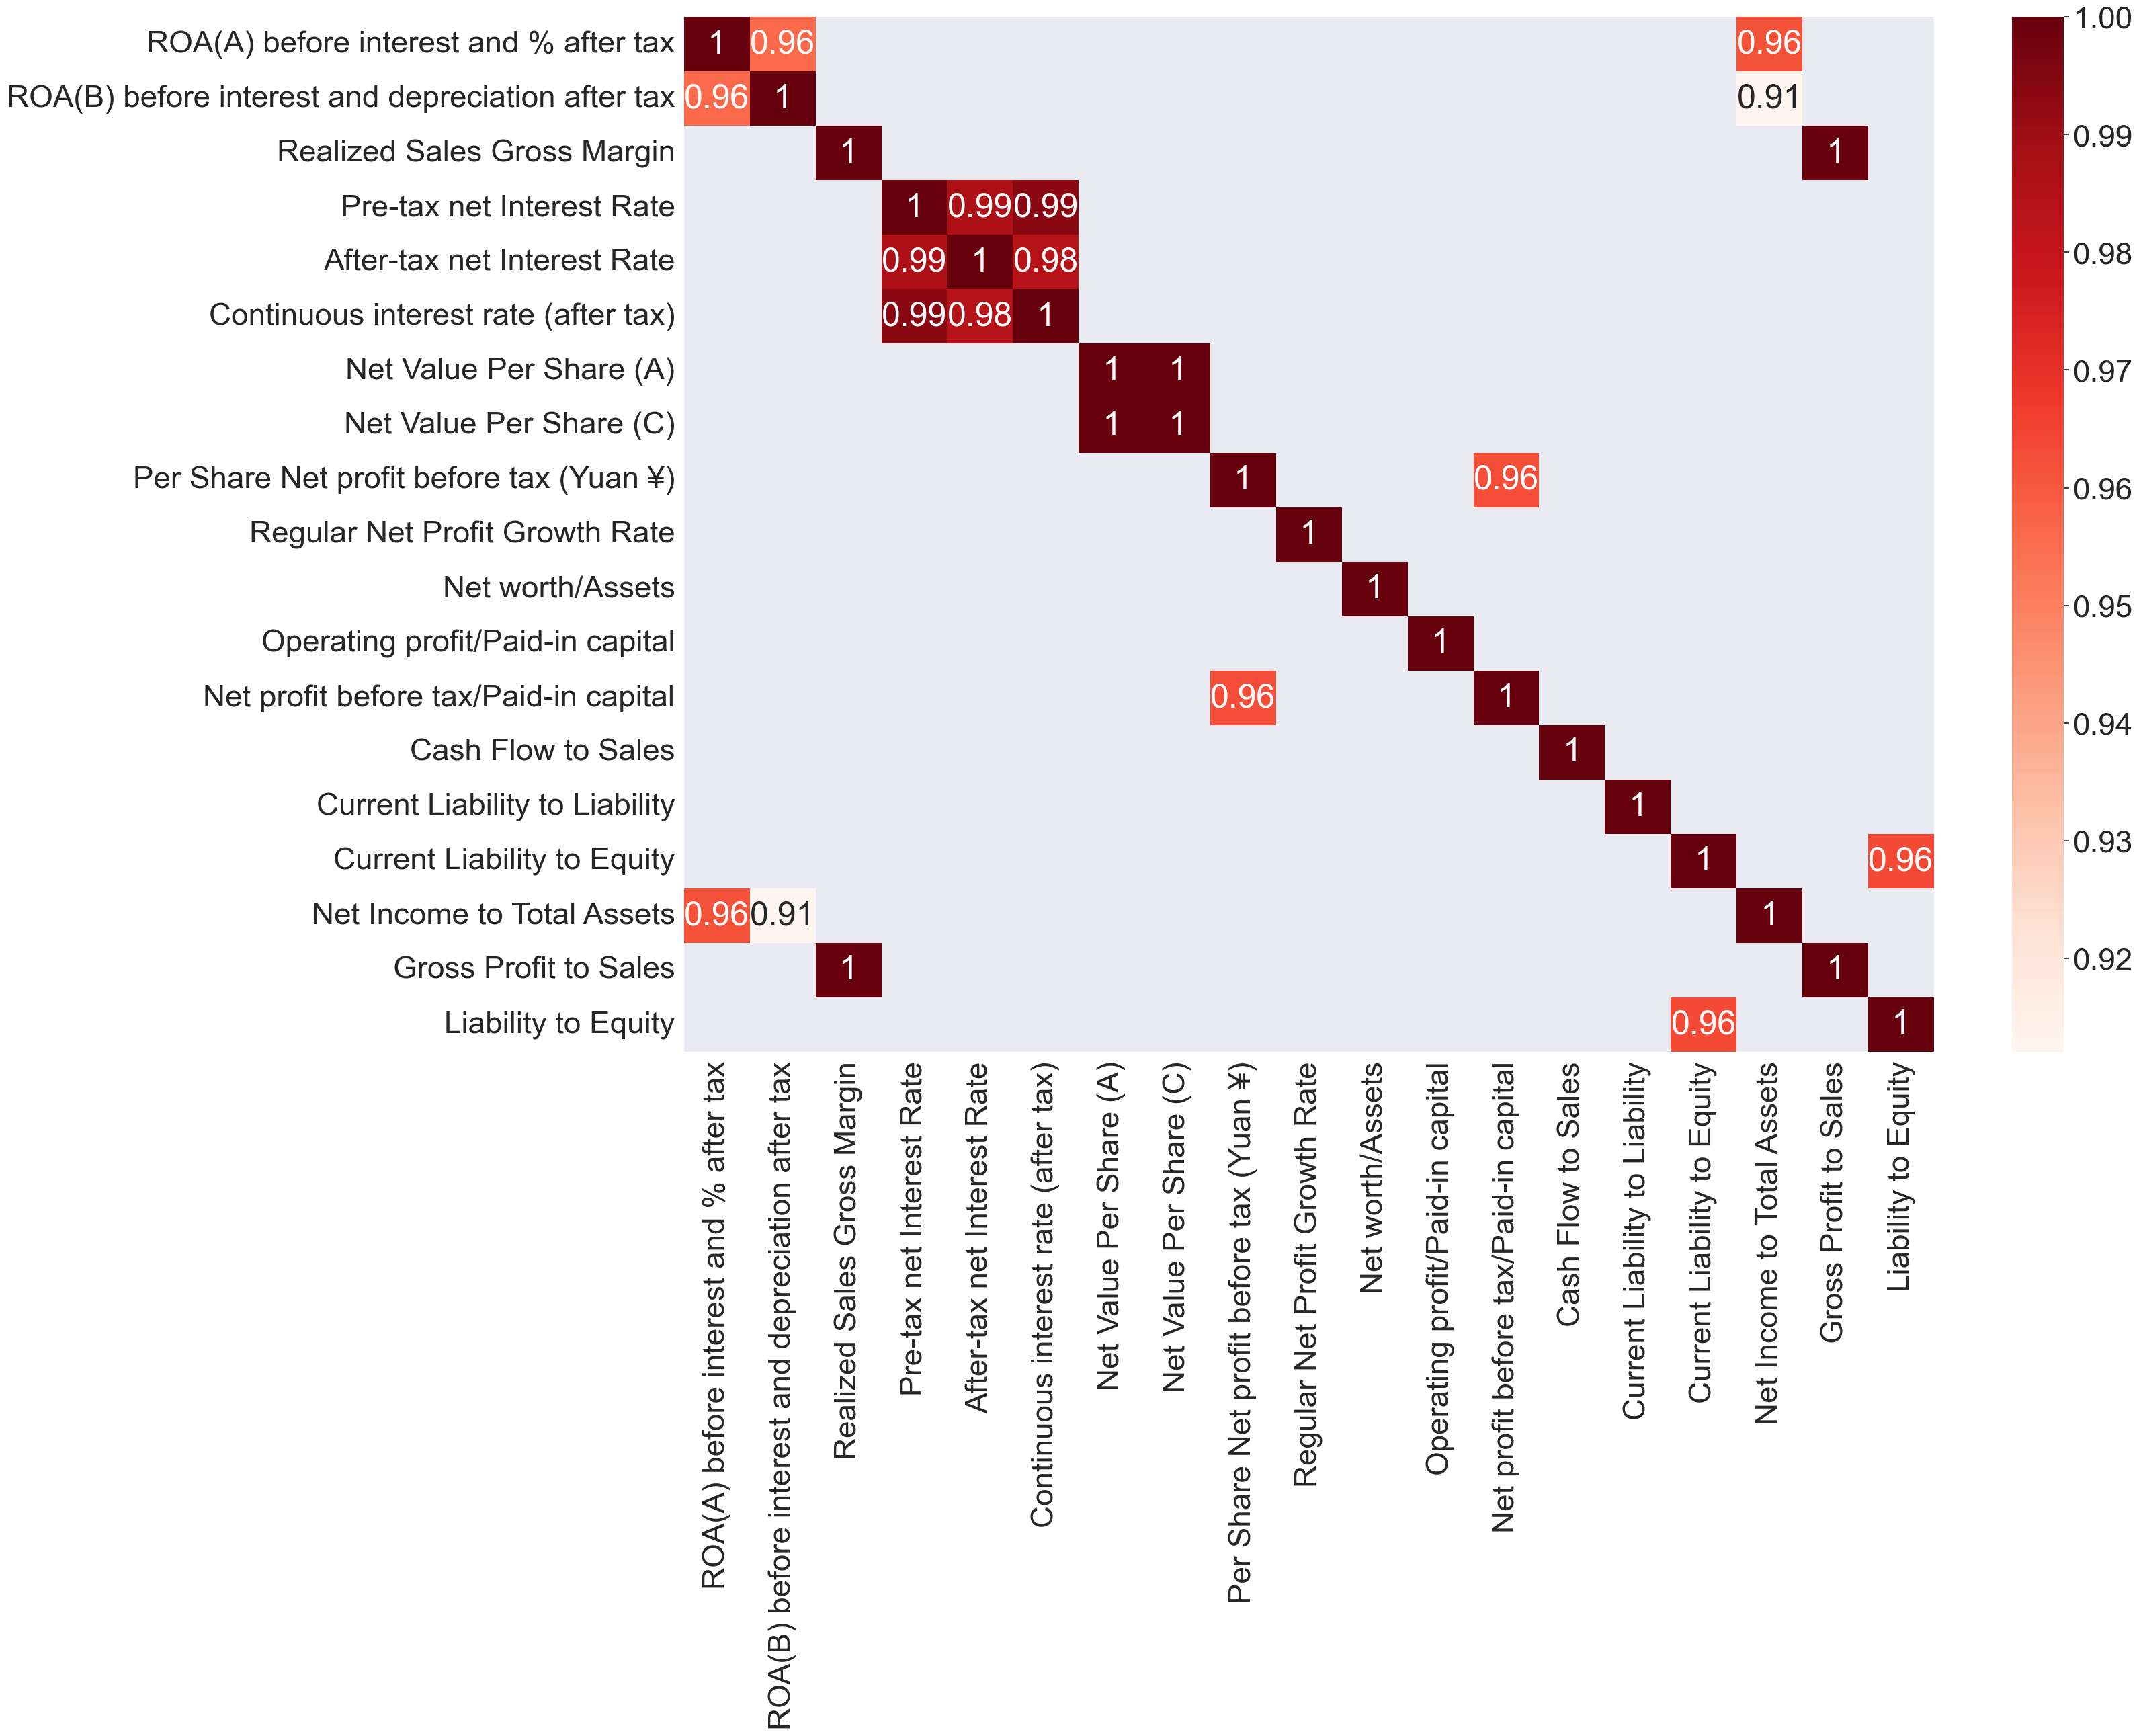

In [54]:
# Create the heatmap with the columns selected for high colinearity and represent only the colors of when the correlation is higher than 0.9
dfCorr = df2.corr().abs()
filteredDf = dfCorr[(dfCorr >= .9)]
plt.figure(figsize=(30,20))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
sns.set(font_scale=3)
plt.show()

Define the columns to drop based on the analysis done on column correlated > 0.9 and drop them

In [16]:
col_drop = ['ROA(B) before interest and depreciation after tax', 'Net Income to Total Assets', 'Realized Sales Gross Margin', 'Pre-tax net Interest Rate', 'Continuous interest rate (after tax)', 'Net Value Per Share (C)', 'Per Share Net profit before tax (Yuan ¥)','Current Liability to Equity']
df_clean = df.drop(col_drop, axis = 1)

### Evaluating the balance between 0 and 1 in target column

In [17]:
category_0 = df_clean[df_clean['Bankrupt?'] == 0]
category_1 = df_clean[df_clean['Bankrupt?'] == 1]
print(category_0.shape)
print('')
print(category_1.shape)

(6599, 86)

(220, 86)


# Splitting test and train

In [18]:
# Split the dataframe bewteen train and test before upsampling on the train

def split_data(df_clean, test_size=0.2, random_state=42):

    df_clean_train, df_clean_test = train_test_split(df_clean, test_size=test_size, random_state=random_state)
    
    return df_clean_train, df_clean_test

df_clean_train, df_clean_test = split_data(df_clean)

In [19]:
category_0 = df_clean_train[df_clean_train['Bankrupt?'] == 0]
category_1 = df_clean_train[df_clean_train['Bankrupt?'] == 1]

print(category_0.shape)
print('')
print(category_1.shape)

(5286, 86)

(169, 86)


In [20]:
test_0 = df_clean_test[df_clean_test['Bankrupt?'] == 0]
test_1 = df_clean_test[df_clean_test['Bankrupt?'] == 1]

print(test_0.shape)
print('')
print(test_1.shape)

(1313, 86)

(51, 86)


# Upsampling

In [21]:
# upsample the positive class now

c0_len = len(category_0)
c1_len = len(category_1)

category_1_up = category_1.sample(c0_len, replace=True) # replace=True allows sampling of the same row more than once.
print(category_0.shape)
print(category_1_up.shape)

(5286, 86)
(5286, 86)


In [22]:
df_clean_train_up = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
df_clean_train_up = df_clean_train_up.sample(frac=1)
print('shape after upsampling and concatenating the tables: ', df_clean_train_up.shape)

shape after upsampling and concatenating the tables:  (10572, 86)


# Splitting X and y from train and test data

In [23]:
# Splitting the train data

def split_X_y(df, target_col):
    # Split dataframe into X and y
    X_train = df.drop(target_col, axis=1) #predictive variables
    y_train = df[target_col] #predicted varuable

    return X_train, y_train

X_train, y_train = split_X_y(df_clean_train_up, 'Bankrupt?')

In [24]:
X_train.shape

(10572, 85)

In [25]:
X_test, y_test = split_X_y(df_clean_test, 'Bankrupt?')

In [26]:
X_test.shape

(1364, 85)







****************************************************************************************************************************
# SGD classifier
****************************************************************************************************************************

## 1 - SGD without feature selection



__Scaling the data using standard scaling__

In [27]:
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled =pd.DataFrame(X_train_scaled, columns=X_train.columns)
    
    X_test_scaled = scaler.transform(X_test) #not building a new scaler we're fitting on the scale defined for train
    X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled

## scaling the features 
X_train_scaled,X_test_scaled=scale_features(X_train, X_test)

__Constructing the model__

In [28]:
from sklearn.linear_model import SGDClassifier
modelSGD = SGDClassifier(loss='log', max_iter=1500, alpha=0.001, penalty = 'l2')
SGD = modelSGD.fit(X_train_scaled, y_train)

__Evaluating the model and Predicting the results__

,Error_metric,Train,Test
0,Accuracy,0.891600,0.862170
1,Precision,0.880795,0.181395
2,Recall,0.905789,0.764706


Confusion matrix for the train set
[[4638  648]
 [ 498 4788]]


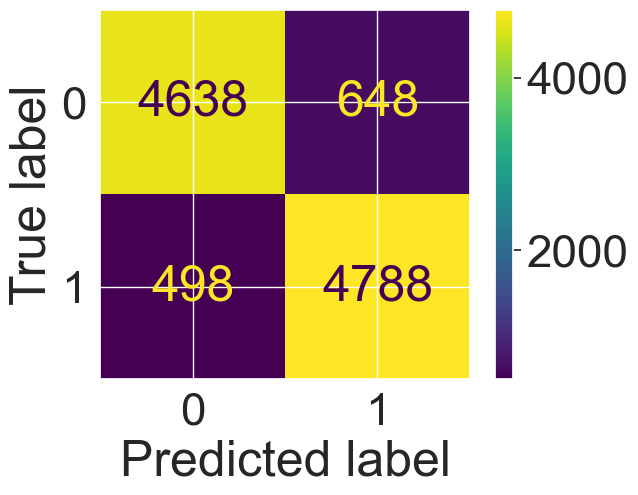



Confusion matrix for the test set
[[1137  176]
 [  12   39]]


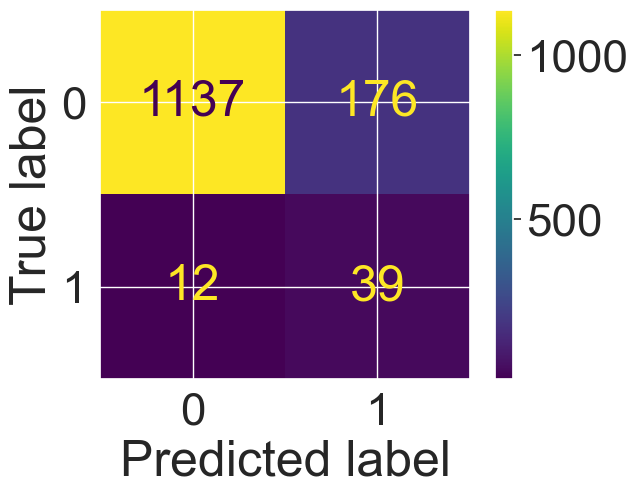

In [29]:
y_pred_train = modelSGD.predict(X_train_scaled)
y_pred_test=modelSGD.predict(X_test_scaled)

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train, y_pred_train))
plot_confusion_matrix(modelSGD,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test))
plot_confusion_matrix(modelSGD,X_test_scaled,y_test, values_format = 'd')
plt.show()

### The Receiver Operating Characteristic (ROC) curve

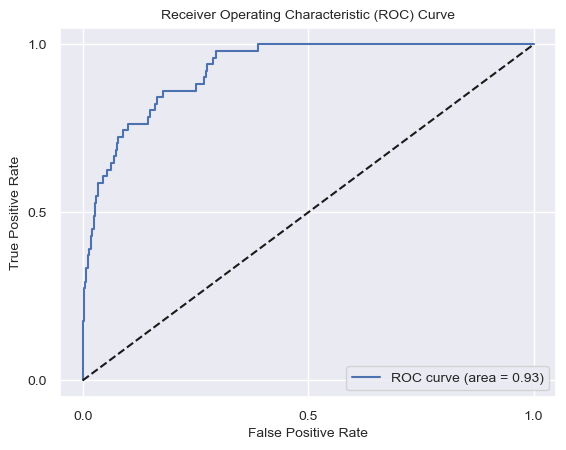

In [30]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
probs = modelSGD.predict_proba(X_test_scaled)[:, 1] #important : because pred prob 51% is worse than 80

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=10)
plt.legend(loc='lower right', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [31]:
roc_auc

0.9250332273046309

**************************************************************************************************************************
## 2 - SGD model with feature selection



### Identify the features that has the most influence on the model

In [32]:
def report_coef_train(model, feature_names):
    coef = pd.DataFrame(model.coef_.T, columns=['Coefficient'], index=feature_names)
    intercept = pd.DataFrame([model.intercept_], columns=['Intercept'], index=[''])
    return pd.concat([coef, intercept])

report_coef_train(modelSGD, X_train_scaled.columns)

,Coefficient,Intercept
ROA(C) before interest and depreciation before interest,-0.704891,NaN
ROA(A) before interest and % after tax,-0.611364,NaN
Operating Gross Margin,-0.026233,NaN
Operating Profit Rate,0.706833,NaN
After-tax net Interest Rate,0.438933,NaN
...,...,...
Liability to Equity,-0.149184,NaN
Degree of Financial Leverage (DFL),0.091738,NaN
Interest Coverage Ratio (Interest expense to EBIT),0.109334,NaN
Equity to Liability,-0.803195,NaN


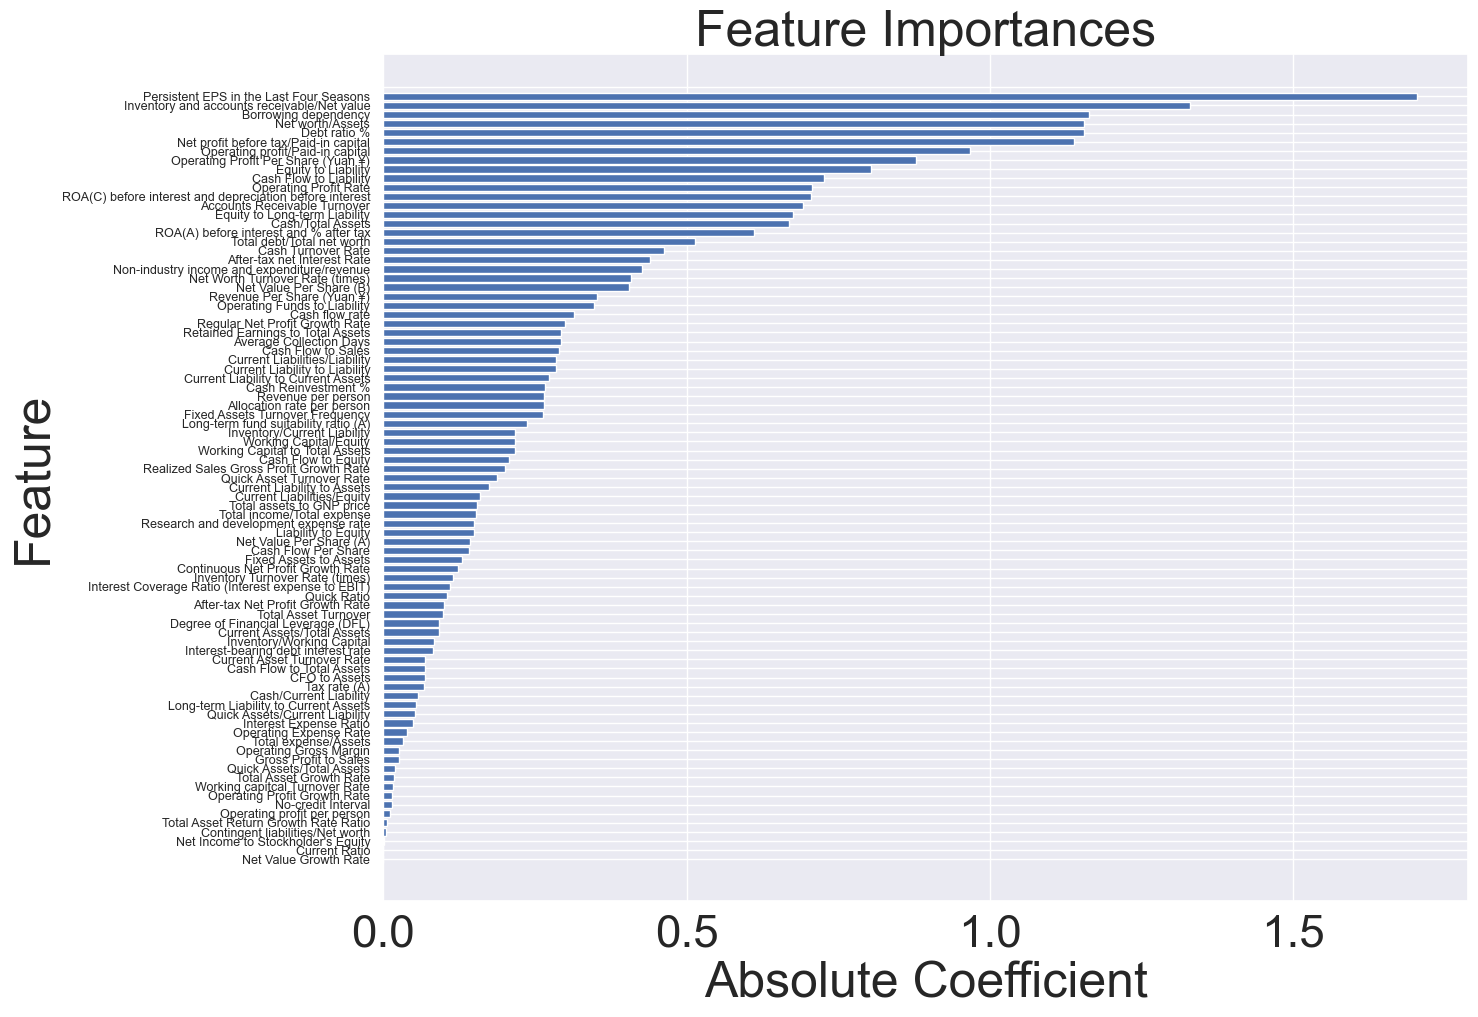

In [33]:
import matplotlib.pyplot as plt

# Get coefficients
coefs = report_coef_train(modelSGD, X_train_scaled.columns)['Coefficient']
# Get sorted indices
sorted_idx = abs(coefs).sort_values().index
# Plot horizontal bar chart of feature importances
plt.figure(figsize=(14, 11))
plt.barh(range(len(sorted_idx)), abs(coefs[sorted_idx]), align='center')
plt.yticks(range(len(sorted_idx)), sorted_idx, fontsize=9)
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()

In [34]:
# Select the columns with coeficient less than 1
coefs_df = pd.DataFrame(abs(coefs))
coefs_less1 = coefs_df[coefs_df['Coefficient'] < 0.5]

In [36]:
# Select the list of columns to drop because the coef is less than1
drop_list = coefs_less1.index.tolist()
df_clean_feature = df_clean.drop(drop_list, axis = 1)
df_clean_feature.shape

(6819, 18)

###  Repeat all the steps of splitting and model construction after feature selection

(5286, 18)
(5286, 18)


,Error_metric,Train,Test
0,Accuracy,0.881101,0.854106
1,Precision,0.870381,0.181034
2,Recall,0.895573,0.823529


Confusion matrix for the train set
[[4581  705]
 [ 552 4734]]


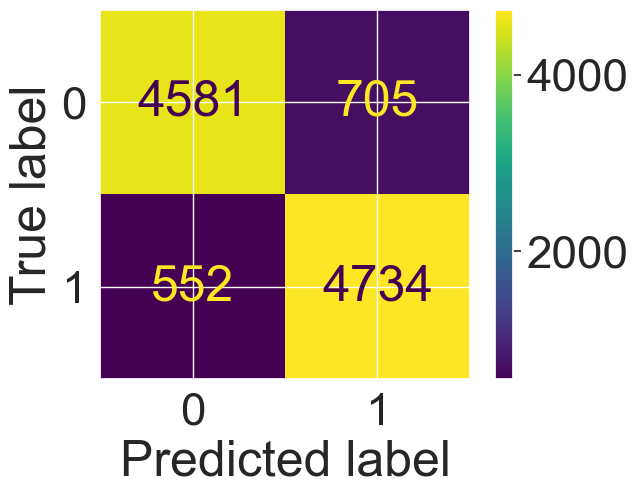



Confusion matrix for the test set
[[1123  190]
 [   9   42]]


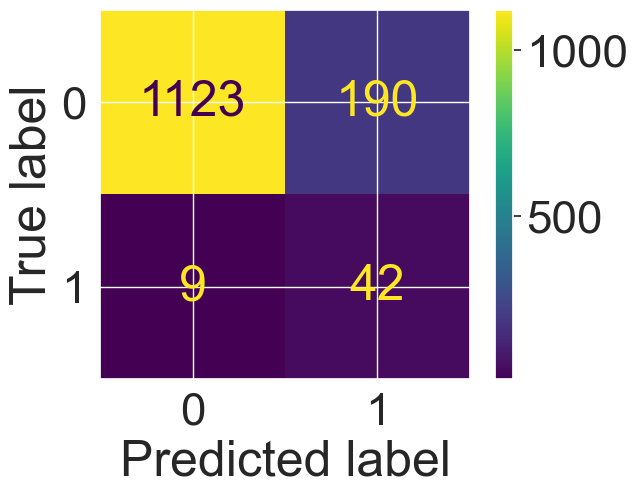

In [37]:
# Split the dataframe bewteen train and test before upsampling on the train

def split_data(df_clean, test_size=0.2, random_state=42):

    df_clean_train, df_clean_test = train_test_split(df_clean, test_size=test_size, random_state=random_state)
    
    return df_clean_train, df_clean_test

df_clean_train, df_clean_test = split_data(df_clean_feature)

# Define categories

category_0 = df_clean_train[df_clean_train['Bankrupt?'] == 0]
category_1 = df_clean_train[df_clean_train['Bankrupt?'] == 1]

# Upsample the positive class now

c0_len = len(category_0)
c1_len = len(category_1)

category_1_up = category_1.sample(c0_len, replace=True) # replace=True allows sampling of the same row more than once.
print(category_0.shape)
print(category_1_up.shape)

df_clean_train_up = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
df_clean_train_up = df_clean_train_up.sample(frac=1)

# Splitting the train data

def split_X_y(df, target_col):
    # Split dataframe into X and y
    X_train = df.drop(target_col, axis=1) #predictive variables
    y_train = df[target_col] #predicted varuable

    return X_train, y_train

X_train, y_train = split_X_y(df_clean_train_up, 'Bankrupt?')
X_test, y_test = split_X_y(df_clean_test, 'Bankrupt?')

# Scaling the data

def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled =pd.DataFrame(X_train_scaled, columns=X_train.columns)
    
    X_test_scaled = scaler.transform(X_test) #not building a new scaler we're fitting on the scale defined for train
    X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled

# scaling the features 
X_train_scaled,X_test_scaled=scale_features(X_train, X_test)

# Constraucting the model
from sklearn.linear_model import SGDClassifier
modelSGD = SGDClassifier(loss='log', max_iter=1500, alpha=0.001, penalty = 'l2')
SGD = modelSGD.fit(X_train_scaled, y_train)

y_pred_train = modelSGD.predict(X_train_scaled)
y_pred_test=modelSGD.predict(X_test_scaled)

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train, y_pred_train))
plot_confusion_matrix(modelSGD,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test))
plot_confusion_matrix(modelSGD,X_test_scaled,y_test, values_format = 'd')
plt.show()

### The Receiver Operating Characteristic (ROC) curve

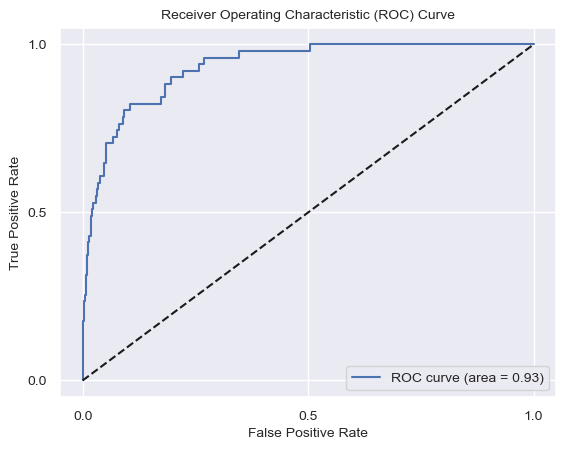

In [38]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
probs = modelSGD.predict_proba(X_test_scaled)[:, 1] #important : because pred prob 51% is worse than 80

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=10)
plt.legend(loc='lower right', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [39]:
roc_auc

0.9327091080148739


******************************************************************************************************************************
# ComplementNB
******************************************************************************************************************************


__No oversampling : Splitting X and y from train and test data__

In [40]:
#splitting the train data

def split_X_y(df, target_col):
    # Split dataframe into X and y
    X_NC = df.drop(target_col, axis=1)
    y_NC = df[target_col] 

    return X_NC, y_NC

X_NC, y_NC = split_X_y(df_clean, 'Bankrupt?')

In [41]:
df_clean.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Cash Flow to Equity,Current Liability to Current Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.601457,0.998969,0.808809,0.302646,1.256969e-04,0.0,0.458143,...,0.312905,0.118250,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.610235,0.998946,0.809301,0.303556,2.897851e-04,0.0,0.461867,...,0.314163,0.047775,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.601450,0.998857,0.808388,0.302035,2.361297e-04,25500000.0,0.458521,...,0.314515,0.025346,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.583541,0.998700,0.808966,0.303350,1.078888e-04,0.0,0.465705,...,0.302382,0.067250,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.598783,0.998973,0.809304,0.303475,7.890000e+09,0.0,0.462746,...,0.311567,0.047725,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [42]:
def split_data(X, y, test_size=0.2, random_state=42):
    
    X_train_NC, X_test_NC, y_train_NC, y_test_NC = train_test_split(X_NC, y_NC, test_size=test_size, random_state=random_state)
    
    return X_train_NC, X_test_NC, y_train_NC, y_test_NC

X_train_NC, X_test_NC, y_train_NC, y_test_NC = split_data(X_NC, y_NC)

In [43]:
def scale_features(X_train_NC, X_test_NC):
    scaler = MinMaxScaler()
    X_train_scaled_NC = scaler.fit_transform(X_train_NC)
    X_train_scaled_NC =pd.DataFrame(X_train_scaled_NC, columns=X_train_NC.columns)
    
    X_test_scaled_NC = scaler.transform(X_test_NC)
    X_test_scaled_NC=pd.DataFrame(X_test_scaled_NC, columns=X_test_NC.columns)
    
    return X_train_scaled_NC, X_test_scaled_NC

X_train_scaled_NC,X_test_scaled_NC=scale_features(X_train_NC, X_test_NC)

In [44]:
from sklearn.naive_bayes import ComplementNB
modelNB = ComplementNB(alpha = 1)
modelNB.fit(X_train_scaled_NC, y_train_NC)

ComplementNB(alpha=1)

,Error_metric,Train,Test
0,Accuracy,0.820348,0.813783
1,Precision,0.102061,0.122677
2,Recall,0.615385,0.647059


Confusion matrix for the train set
[[4371  915]
 [  65  104]]


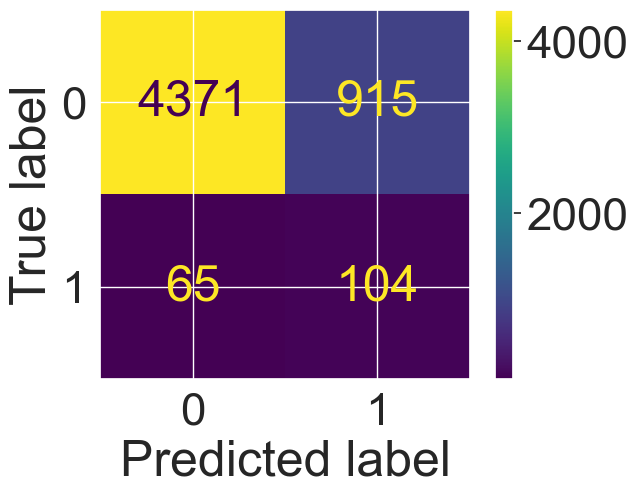



Confusion matrix for the test set
[[1077  236]
 [  18   33]]


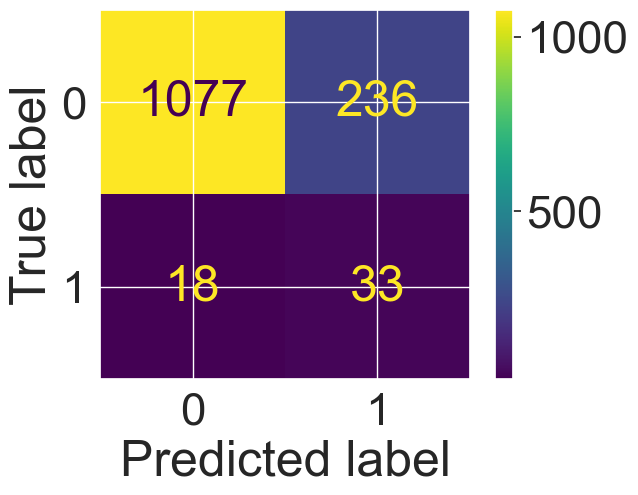

In [45]:
y_pred_train_NC = modelNB.predict(X_train_scaled_NC)
y_pred_test_NC=modelNB.predict(X_test_scaled_NC)

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_NC, y_pred_train_NC),
                                         precision_score(y_train_NC, y_pred_train_NC),
                                         recall_score(y_train_NC, y_pred_train_NC)],
                               'Test': [accuracy_score(y_test_NC, y_pred_test_NC),
                                        precision_score(y_test_NC, y_pred_test_NC),
                                        recall_score(y_test_NC, y_pred_test_NC)]})

display(performance)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_NC,y_pred_train_NC))
plot_confusion_matrix(modelNB,X_train_scaled_NC,y_train_NC, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_NC, y_pred_test_NC))
plot_confusion_matrix(modelNB,X_test_scaled_NC,y_test_NC, values_format = 'd')
plt.show()

__optimizing the hyperparameter for ClassifierNB model using cross validation__

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

scores=cross_val_score(modelNB, X_train_scaled_NC, y_train_NC, cv=5) #cv number of folds (k)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.82493126 0.8111824  0.81943171 0.83776352 0.82768103]
Score stats: 0.82 accuracy with a standard deviation of 0.01


# ComplementNB

__With oversampling and feature selection : Splitting X and y from train and test data__

In [47]:
# Splitting the train data used with upsampling

def split_X_y(df, target_col):
    # Split dataframe into X and y
    X_train = df.drop(target_col, axis=1) #predictive variables
    y_train = df[target_col] #predicted varuable

    return X_train, y_train

X_train, y_train = split_X_y(df_clean_train_up, 'Bankrupt?')

In [48]:
X_test, y_test = split_X_y(df_clean_test, 'Bankrupt?')

In [49]:
def scale_features(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled_NCup = scaler.fit_transform(X_train)
    X_train_scaled_NCup =pd.DataFrame(X_train_scaled_NCup, columns=X_train.columns)
    
    X_test_scaled_NCup = scaler.transform(X_test)
    X_test_scaled_NCup=pd.DataFrame(X_test_scaled_NCup, columns=X_test.columns)
    
    return X_train_scaled_NCup, X_test_scaled_NCup

X_train_scaled_NCup,X_test_scaled_NCup=scale_features(X_train, X_test)

In [50]:
from sklearn.naive_bayes import ComplementNB
modelNBup = ComplementNB(alpha = 1)
modelNBup.fit(X_train_scaled_NCup, y_train)

ComplementNB(alpha=1)

,Error_metric,Train,Test
0,Accuracy,0.795781,0.739736
1,Precision,0.758558,0.120000
2,Recall,0.867764,0.941176


Confusion matrix for the train set
[[3826 1460]
 [ 699 4587]]


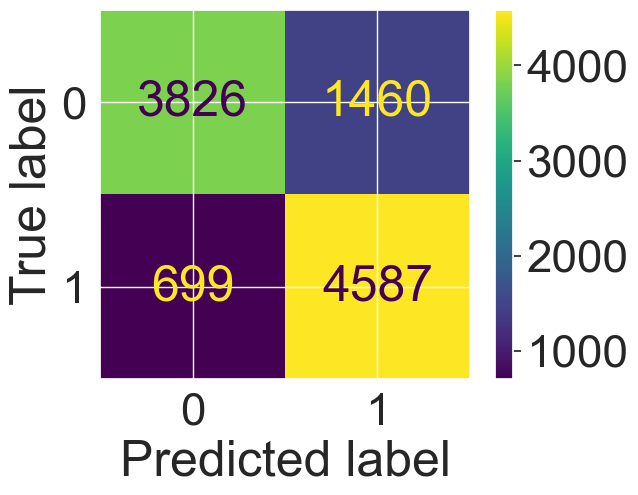



Confusion matrix for the test set
[[961 352]
 [  3  48]]


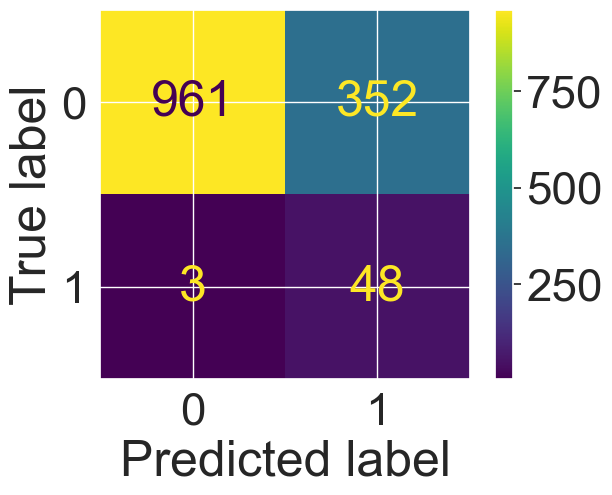

In [51]:
y_pred_train_NCup = modelNBup.predict(X_train_scaled_NCup)
y_pred_test_NCup=modelNBup.predict(X_test_scaled_NCup)

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_NCup),
                                         precision_score(y_train, y_pred_train_NCup),
                                         recall_score(y_train, y_pred_train_NCup)],
                               'Test': [accuracy_score(y_test, y_pred_test_NCup),
                                        precision_score(y_test, y_pred_test_NCup),
                                        recall_score(y_test, y_pred_test_NCup)]})

display(performance)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_NCup))
plot_confusion_matrix(modelNBup,X_train_scaled_NCup,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_NCup))
plot_confusion_matrix(modelNBup,X_test_scaled_NCup,y_test, values_format = 'd')
plt.show()

optimizing the hyperparameter for ClassifierNB model using cross validation

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

scores=cross_val_score(modelNBup, X_train_scaled_NCup, y_train, cv=5) #cv number of folds (k)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.80189125 0.79479905 0.79139073 0.7871334  0.8140965 ]
Score stats: 0.80 accuracy with a standard deviation of 0.01


# Code for heatmap

In [ ]:
# First we determine the absolute correlation between the pair of columns
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

# Create a list of name of columns that have a correlation > 0.9 with at least one other column
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(); print(to_drop)

# Reduce the dataframe into a dataframe that represent only the columns with high colinearity
columns = [...]
df2 = df[columns]
df2.head()

# Create the heatmap with the columns selected for high colinearity
dfCorr = df2.corr().abs()
filteredDf = dfCorr[(dfCorr >= .9)]
plt.figure(figsize=(30,20))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
sns.set(font_scale=3)
plt.show()